# Dataset visualization

### Nececary imports

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading the data

In [4]:
df = pd.DataFrame(pd.read_csv('../dataset_generation/data/Music_Dataset.csv'))

### Attributes

In [5]:
df.keys()

Index(['id', 'album_uri', 'album_name', 'album_img', 'album_release_date',
       'album_release_year', 'album_popularity', 'track_name', 'track_uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'key_mode', 'track_popularity',
       'artist_name'],
      dtype='object')

### Overview

In [6]:
df.head()

,id,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity,artist_name
0,1,0vE6mttRTBXRe9rKghyr1l,The Slim Shady LP,https://i.scdn.co/image/a0f2991fb2081a8b33c8ea...,1999-02-23,1999-02-23,69,Public Service Announcement,3GhcNCBIEMyrcpCJ8ccvXr,0.648,...,0.27500,0.000000,0.1360,0.950,149.548,33227,1,C# major,49,Eminem
1,2,0vE6mttRTBXRe9rKghyr1l,The Slim Shady LP,https://i.scdn.co/image/a0f2991fb2081a8b33c8ea...,1999-02-23,1999-02-23,69,My Name Is,75IN3CtuZwTHTnZvYM4qnJ,0.869,...,0.04160,0.000001,0.0914,0.815,85.519,268400,4,C# major,73,Eminem
2,3,0vE6mttRTBXRe9rKghyr1l,The Slim Shady LP,https://i.scdn.co/image/a0f2991fb2081a8b33c8ea...,1999-02-23,1999-02-23,69,Guilty Conscience,6da04YB906XonC6IQNC44u,0.660,...,0.05270,0.000000,0.3410,0.513,182.218,199333,4,G major,66,Eminem
3,4,0vE6mttRTBXRe9rKghyr1l,The Slim Shady LP,https://i.scdn.co/image/a0f2991fb2081a8b33c8ea...,1999-02-23,1999-02-23,69,Brain Damage,099MPsZhn5HkEUNlpA89rK,0.866,...,0.00917,0.000000,0.0655,0.831,94.982,226733,4,D major,58,Eminem
4,5,0vE6mttRTBXRe9rKghyr1l,The Slim Shady LP,https://i.scdn.co/image/a0f2991fb2081a8b33c8ea...,1999-02-23,1999-02-23,69,Paul - Skit,0AaKi10VdO06R4fkBFBslc,0.816,...,0.98100,0.000059,0.7990,0.837,130.845,15840,4,G# major,2,Eminem


### Attribute value distributions

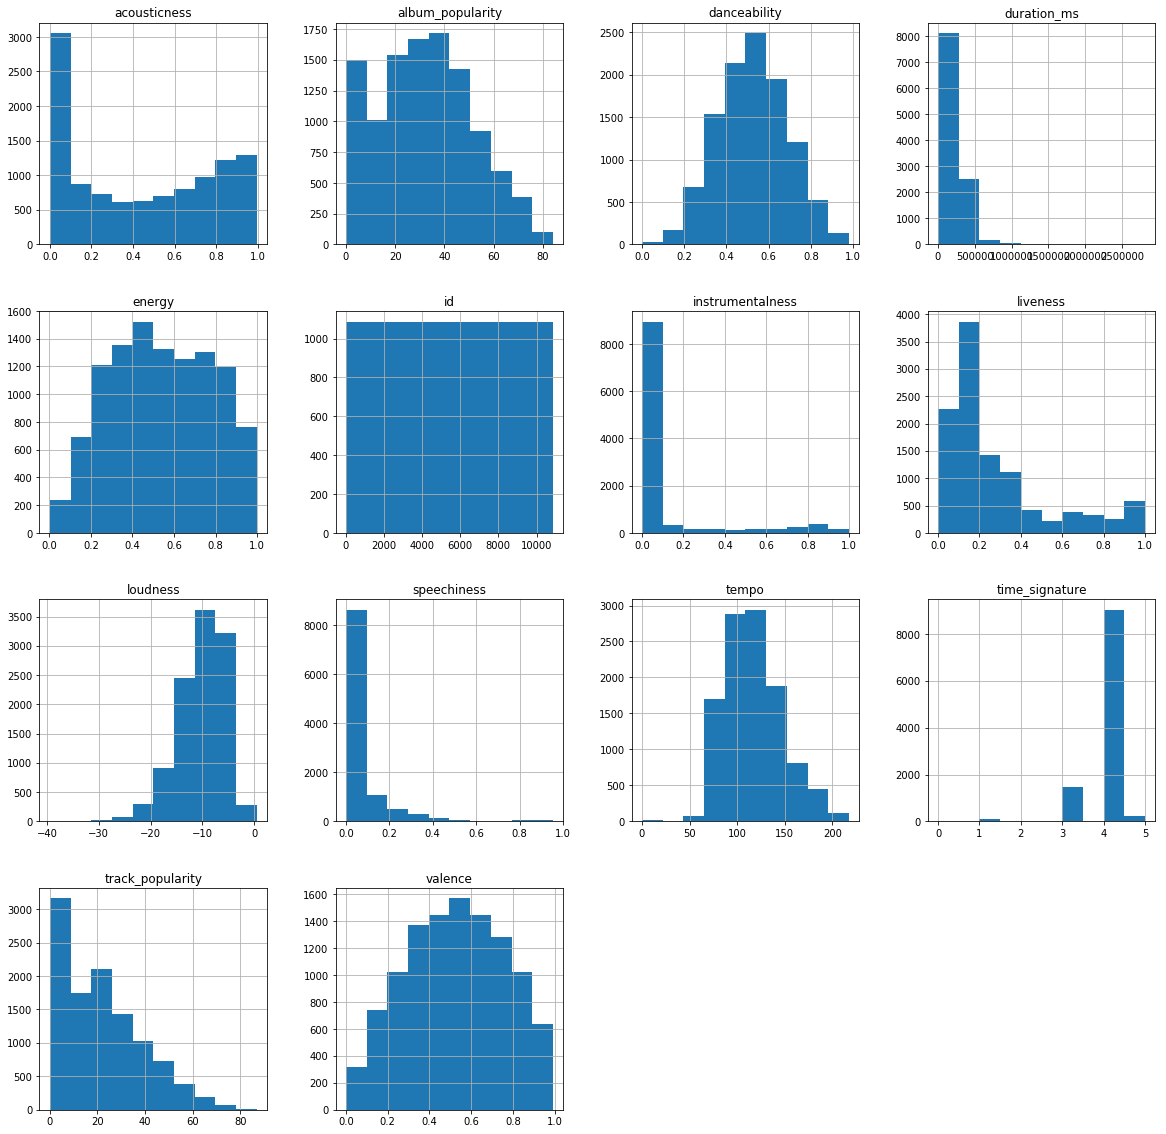

In [7]:
pd.DataFrame.hist(df, figsize=[20,20]);

In [8]:
maxv = df.max(axis=0)
maxv = maxv.drop(labels=['id', 'track_name', 'album_uri', 'album_name', 'track_uri', 'key', \
                         'mode', 'key_mode', 'artist_name', 'album_release_date', \
                         'album_release_year'])
minv = df.min(axis=0)
minv = minv.drop(labels=['id', 'track_name', 'album_uri', 'album_name', 'track_uri', 'key', \
                         'mode', 'key_mode', 'artist_name', 'album_release_date', \
                         'album_release_year'])

s = ''
for k in maxv.keys():
    s += "%25s | min: %15.5f | max: %15.5f\n" % (k, float(minv[k]), float(maxv[k]))
print(s)

         album_popularity | min:         0.00000 | max:        84.00000
             danceability | min:         0.00000 | max:         0.98000
                   energy | min:         0.00169 | max:         0.99900
                 loudness | min:       -39.45100 | max:         0.49600
              speechiness | min:         0.00000 | max:         0.95400
             acousticness | min:         0.00000 | max:         0.99600
         instrumentalness | min:         0.00000 | max:         0.99900
                 liveness | min:         0.00000 | max:         1.00000
                  valence | min:         0.00000 | max:         0.99200
                    tempo | min:         0.00000 | max:       217.55700
              duration_ms | min:      4000.00000 | max:   2809893.00000
           time_signature | min:         0.00000 | max:         5.00000
         track_popularity | min:         0.00000 | max:        87.00000



### Null values

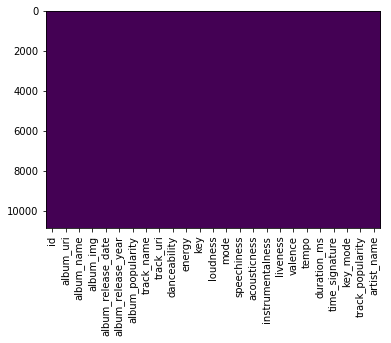

In [17]:
number_of_columns = df.shape[1]
plt.xticks(range(0, number_of_columns), df.columns, rotation='vertical')
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')

### Data relations

#### Energy vs. Loudness

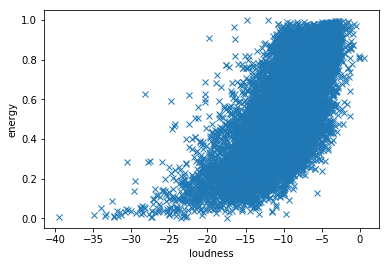

In [18]:
plt.xlabel('loudness')
plt.ylabel('energy')
plt.plot(df['loudness'], df['energy'], 'x')

#### Loudness vs. tempo

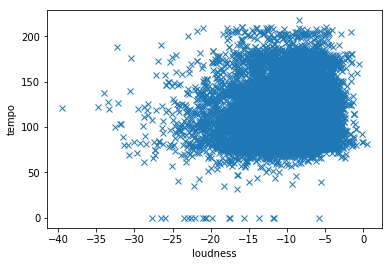

In [19]:
plt.xlabel('loudness')
plt.ylabel('tempo')
plt.plot(df['loudness'], df['tempo'], 'x')

#### Polularity vs. valence

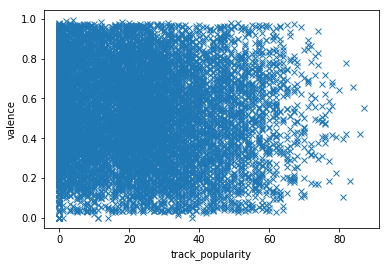

In [20]:
plt.xlabel('track_popularity')
plt.ylabel('valence')
plt.plot(df['track_popularity'], df['valence'], 'x')

#### Danceability vs. valence

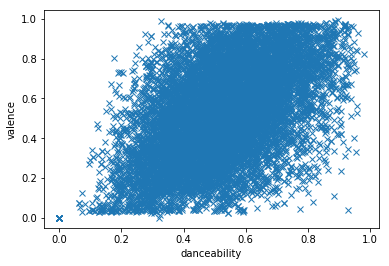

In [21]:
plt.xlabel('danceability')
plt.ylabel('valence')
plt.plot(df['danceability'], df['valence'], 'x')